In [ ]:

'''
Assignment #3
Rezwan-Ul-Alam (ID: 2011659042)
Md. Nur Alam Jowel (ID: 2012355042)
Raian Ruku (ID: 2013409642)

'''

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options =
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers


In [6]:
#load the train data
X = np.load("/content/drive/MyDrive/data/handsignX.npy")
y = np.load("/content/drive/MyDrive/data/handsigny.npy")
#print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of y is:  0
The last element of y is:  9
The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


In [ ]:
#define the model
'''model = Sequential([
    Dense(128, activation='relu', input_shape=(400,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
t_model = model.fit(X, y, epochs=10, validation_split=0.2) '''

In [3]:
model = Sequential(
    [
        InputLayer((400,)),
        Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(25, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(15, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(10, activation="linear")
    ])


In [ ]:
model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
t_model = model.fit(X,y,epochs=40)

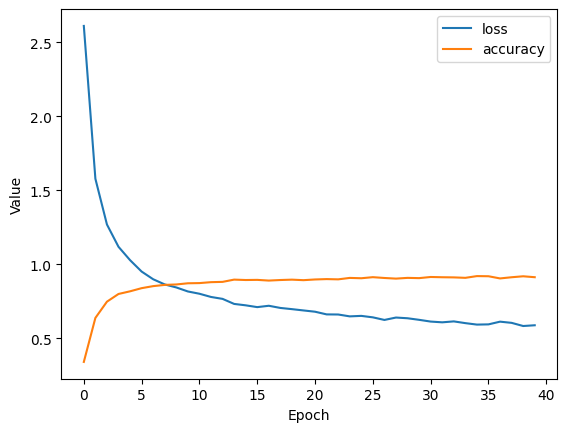

In [ ]:
# Visualize training history for both loss and accuracy
plt.plot(t_model.history['loss'], label='loss')
plt.plot(t_model.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
train_loss, train_accuracy = model.evaluate(X, y)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

In [8]:
import os
import cv2
import numpy as np
import pandas as pd
import json
json_path = '/content/drive/MyDrive/Test/Test/dd.json'
from PIL import Image  # For opening and converting images

with open(json_path) as f:
    data = json.load(f)
test_images = []
test_labels = []
for filename, image_data in data.items():
    img = Image.open("/content/drive/MyDrive/Test/Test/" + image_data["filename"])
    img_array = np.array(img.convert('L').resize((20, 20))).flatten()
    test_images.append(img_array)
    test_labels.append(int(image_data["regions"][0]["region_attributes"]["shape"]))

X_test = np.array(test_images)
y_test = np.array(test_labels).reshape(-1, 1)

In [ ]:
'''test_path = "/content/drive/MyDrive/Test/Test"

def load_and_preprocess_image(image_path):
  # Load the image from the path
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(20, 20), grayscale=True)
  # Convert the image to a numpy array
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  # Reshape the image to match the training data format (20x20 -> 400)
  img_array_flattened = img_array.reshape(400)
  # Normalize the pixel values (usually between 0 and 1)
  #img_array_normalized = img_array_flattened / 255.0
  return img_array_flattened

# List to store the preprocessed test images
test_images = []

# Loop through all files in the test path
for filename in os.listdir(test_path):
  # Get the full path of the image
  image_path = os.path.join(test_path, filename)
  # Load and pre-process the image
  preprocessed_image = load_and_preprocess_image(image_path)
  # Add the preprocessed image to the list
  test_images.append(preprocessed_image)

# Convert the list of images to a numpy array
test_images_array = np.array(test_images)

# Make predictions on the test images using your trained model
predictions = model.predict(test_images_array)

# Get the predicted class labels (argmax gives the index of the highest probability)
predicted_classes = np.argmax(predictions, axis=1)
# Print the predicted class labels for each test image
for i, image_path in enumerate(os.listdir(test_path)):
  print(f"Image: {image_path}, Predicted Class: {y_test[i]}") '''

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)



# **Train output**

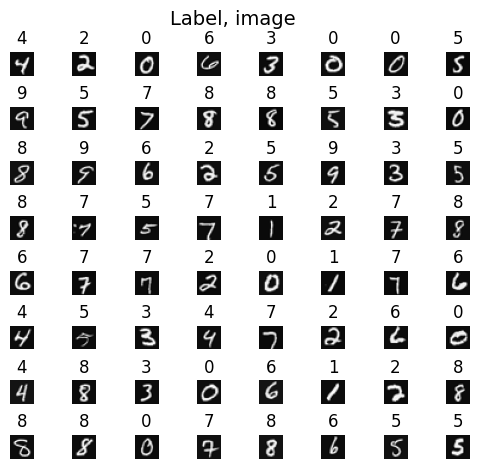

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

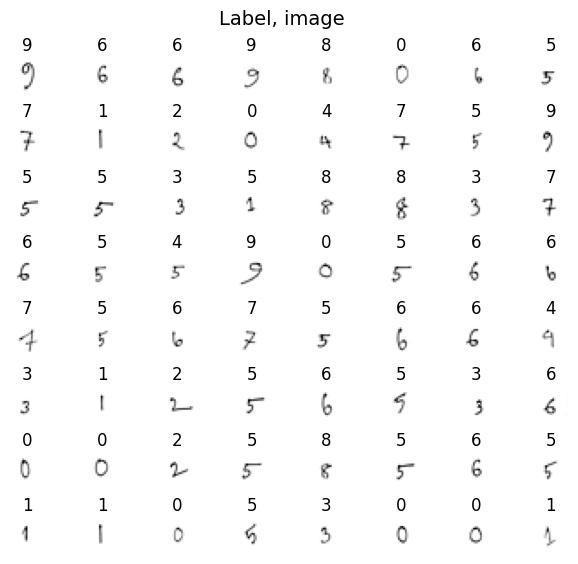

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_test.shape #200 400

fig, axes = plt.subplots(8,8, figsize=(6,6))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_test_random_reshaped = X_test[random_index].reshape((20,20))

    # Display the image
    ax.imshow(X_test_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y_test[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

# **Single Image Train**

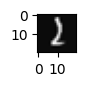

In [ ]:
image_of_two = X[1015]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
X_reshaped = image_of_two.reshape((20,20)).T
ax.imshow(X_reshaped, cmap='gray')
plt.show()

# **Single Image Test**

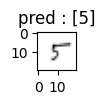

In [ ]:
imagee = X_test[101]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
test_reshaped = imagee.reshape((20,20))
ax.imshow(test_reshaped, cmap='gray')
plt.title(f'pred : {y_test[101]}')
plt.show()
